#Ingestar

In [ ]:

import pandas as pd

df = pd.read_csv('panaderias.csv')

df.head(10)


Bakery  Floor space of the shop  \
0          Yumenoooka Shop                       10   
1       Terai Station Shop                        8   
2                Sone Shop                        8   
3   Hashimoto Station Shop                        5   
4         Kikyou Town Shop                        7   
5         Post Office Shop                        8   
6  Suidobashi Station Shop                        7   
7      Rokujo Station Shop                        9   
8    Wakaba Riverside Shop                        6   
9              Misato Shop                        9   

   Distance to the nearest station  Monthly sales  
0                               80            469  
1                                0            366  
2                              200            371  
3                              200            208  
4                              300            246  
5                              230            297  
6                               40            363  
7                                0            436  
8                              330            198  
9                              180            364

#Análisis exploratorio de datos

       Floor space of the shop  Distance to the nearest station  Monthly sales
count                10.000000                        10.000000       10.00000
mean                  7.700000                       156.000000      331.80000
std                   1.494434                       119.647631       92.01425
min                   5.000000                         0.000000      198.00000
25%                   7.000000                        50.000000      258.75000
50%                   8.000000                       190.000000      363.50000
75%                   8.750000                       222.500000      369.75000
max                  10.000000                       330.000000      469.00000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Floor space of the shop          10 non-null     int64
 1   Dis

<Axes: xlabel='Distance to the nearest station', ylabel='Monthly sales'>

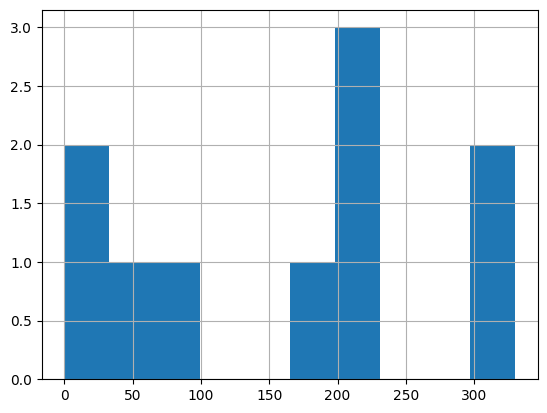

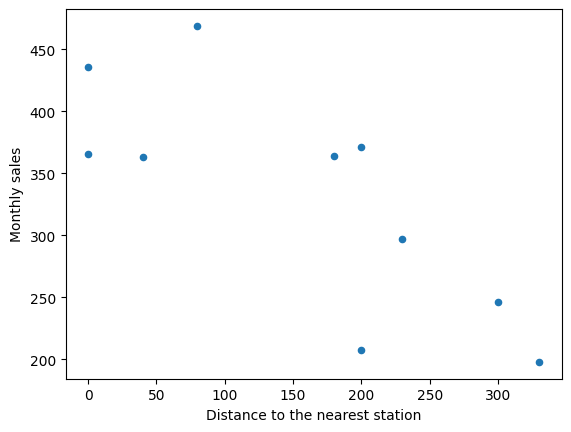

In [ ]:
#analisis exploratorio de datos sobre el dataframe df

df= df.drop(columns=['Bakery'])

# Resumen estadístico de las variables numéricas
print(df.describe())

# Información sobre el dataframe, incluyendo tipos de datos y valores no nulos
print(df.info())

# Número de valores únicos en cada columna
print(df.nunique())

# Verificar valores faltantes
print(df.isnull().sum())

# Histograma de una variable numérica (reemplaza 'nombre_columna' con el nombre de la columna)
df['Distance to the nearest station'].hist()

# Gráfico de dispersión entre dos variables numéricas (reemplaza 'columna1' y 'columna2')
df.plot.scatter(x='Distance to the nearest station', y='Monthly sales')




In [ ]:
# Cálculo de la correlación entre variables numéricas
print(df.corr())


                                 Floor space of the shop  \
Floor space of the shop                         1.000000   
Distance to the nearest station                -0.492155   
Monthly sales                                   0.892385   

                                 Distance to the nearest station  \
Floor space of the shop                                -0.492155   
Distance to the nearest station                         1.000000   
Monthly sales                                          -0.775083   

                                 Monthly sales  
Floor space of the shop               0.892385  
Distance to the nearest station      -0.775083  
Monthly sales                         1.000000  


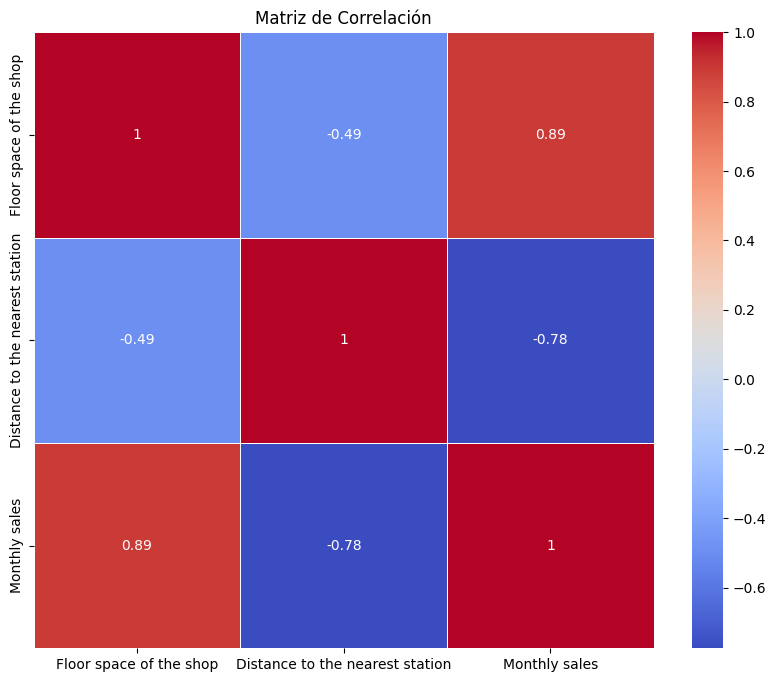

In [ ]:
# graficar matriz de correlacion

import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Crea un mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()


#Regresion multilineal

In [ ]:
#usando skelearn , regresion multineal de df

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define las variables predictoras (X) y la variable objetivo (y)
X = df.drop('Monthly sales', axis=1)  # Reemplaza 'Monthly sales' con la columna de tu variable objetivo
y = df['Monthly sales']


# Crea un modelo de regresión lineal
model = LinearRegression()

# Entrena el modelo con los datos de entrenamiento
model.fit(X, y)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print('Error cuadrático medio (MSE):', mse)
print('Coeficiente de determinación (R^2):', r2)

# Imprime los coeficientes del modelo
print('Coeficientes:', model.coef_)
print('Intercepto:', model.intercept_)


Error cuadrático medio (MSE): 417.3006119994701
Coeficiente de determinación (R^2): 0.945235852681711
Coeficientes: [41.51347826 -0.34088269]
Intercepto: 65.32391638894836


Guardar modelo

In [ ]:
#guardar modelo en formato pickle

import pickle

# Guarda el modelo en un archivo pickle
filename = 'modelo_regresion.pkl'
pickle.dump(model, open(filename, 'wb'))


In [ ]:
# prompt: un dataframe llamado new_data, que tiene las mismas columnas que df

import pandas as pd
new_data = pd.DataFrame({'Floor space of the shop':[11],'Distance to the nearest station':[81]})


In [ ]:
new_data

Floor space of the shop  Distance to the nearest station
0                       11                               81

In [ ]:
# probar que se puede cargar el modelo e inferir - predecir

# Cargar modelo
loaded_model = pickle.load(open('modelo_regresion.pkl', 'rb'))

# Ejemplo de cómo usar el modelo cargado para hacer una predicción
# (Asumiendo que tienes nuevos datos en un DataFrame llamado 'new_data')
# new_data debe tener las mismas columnas que las variables predictoras (X) utilizadas para entrenar el modelo


y_pred_new = loaded_model.predict(new_data)
y_pred_new[0]

494.36067967101843

In [ ]:
# prompt: codigo que haga un interfaz en gradio para cargar modelo_regresion.pkl e introducir las dos variables y mostrar el resultado

import pandas as pd
!pip install gradio

import gradio as gr
import pickle

# Cargar modelo
loaded_model = pickle.load(open('modelo_regresion.pkl', 'rb'))

def predict_sales(floor_space, distance):
  new_data = pd.DataFrame({'Floor space of the shop':[floor_space],'Distance to the nearest station':[distance]})
  prediction = loaded_model.predict(new_data)
  return prediction[0]

# Crear interfaz Gradio
iface = gr.Interface(
  fn=predict_sales,
  inputs=[
    gr.inputs.Number(label="Floor space of the shop"),
    gr.inputs.Number(label="Distance to the nearest station")
  ],
  outputs=gr.outputs.Textbox(label="Predicted Monthly Sales")
)

iface.launch()
